In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/home/ovoinov/work/sk3d/dev.sk_robot_rgbd_data/src')
from skrgbd.data.io import imgio
from skrgbd.data.dataset.pathfinder import Pathfinder
from skrgbd.utils.logging import tqdm
from skrgbd.data.dataset.dataset import wip_scene_name_by_id

In [2]:
pathfinder = Pathfinder(data_root='/mnt/datasets/sk3d/dataset')

In [3]:
dmins = []
dmaxs = []

pairs = [(scene_name, view_i) for scene_name in wip_scene_name_by_id.values() for view_i in range(100)]

for scene_name, view_i in tqdm(pairs):
    depthmap = pathfinder[scene_name].reprojected.depth[('stl', 'clean_reconstruction'), ('tis_right', 'undistorted')][view_i]
    depthmap = imgio.read.stl.depth(depthmap)
    dmins.append(np.nanmin(depthmap))
    dmaxs.append(np.nanmax(depthmap))

  0%|          | 0/10700 [00:00<?, ?it/s]

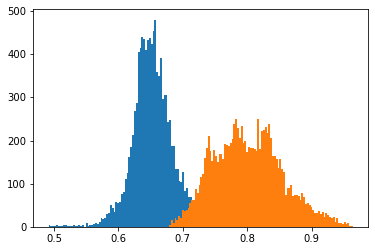

In [5]:
plt.hist(dmins, 100);
plt.hist(dmaxs, 100);

In [14]:
print(np.percentile(dmins, 0), np.percentile(dmins, 5))
print(np.percentile(dmaxs, 100), np.percentile(dmaxs, 95))

0.4916858673095703 0.604068574309349
0.9637538194656372 0.8949113607406616


(0.473, 0.983)

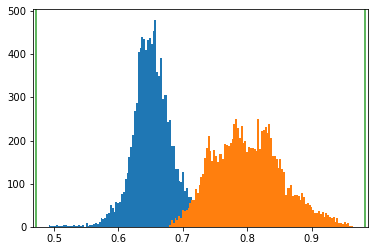

In [21]:
# Option 1: full range, a lot of padding in depth dimension
d_planes_n = 256  # same as usually used for DTU
d_interval = .002  # 2 mm, same as for DTU
d_range = d_interval * (d_planes_n - 1)

target_min = np.percentile(dmins, 0)
target_max = np.percentile(dmaxs, 100)
d_mid = (target_min + target_max) / 2
d_min = round(d_mid - d_range / 2, 3)
d_max = d_min + d_range

plt.hist(dmins, 100);
plt.hist(dmaxs, 100);
plt.axvline(d_min, c='tab:green');
plt.axvline(d_max, c='tab:green');

d_min, d_max

(0.558, 0.9400000000000001)

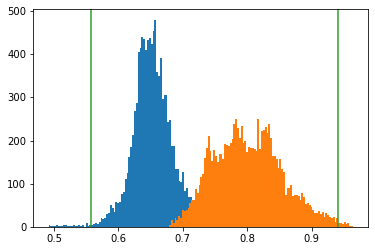

In [22]:
# Option 2: same interval, but fewer planes and less padding
d_planes_n = 192  # same as used for DTU in CasMVSNet
d_interval = .002
d_range = d_interval * (d_planes_n - 1)

target_min = np.percentile(dmins, 5)
target_max = np.percentile(dmaxs, 95)
d_mid = (target_min + target_max) / 2
d_min = round(d_mid - d_range / 2, 3)
d_max = d_min + d_range

plt.hist(dmins, 100);
plt.hist(dmaxs, 100);
plt.axvline(d_min, c='tab:green');
plt.axvline(d_max, c='tab:green');

d_min, d_max

(0.606, 0.8925000000000001)

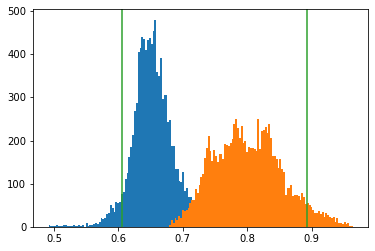

In [23]:
# Option 3: smaller interval, tighter range
d_planes_n = 192
d_interval = .0015  # same as for DTU in VisMVSNet
d_range = d_interval * (d_planes_n - 1)

target_min = np.percentile(dmins, 5)
target_max = np.percentile(dmaxs, 95)
d_mid = (target_min + target_max) / 2
d_min = round(d_mid - d_range / 2, 3)
d_max = d_min + d_range

plt.hist(dmins, 100);
plt.hist(dmaxs, 100);
plt.axvline(d_min, c='tab:green');
plt.axvline(d_max, c='tab:green');

d_min, d_max

(0.558, 0.9405000000000001)

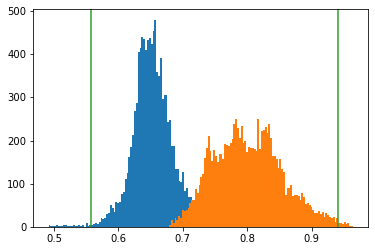

In [24]:
# Option 4: small interval, a less tight range
d_planes_n = 256  # <-
d_interval = .0015
d_range = d_interval * (d_planes_n - 1)

target_min = np.percentile(dmins, 5)
target_max = np.percentile(dmaxs, 95)
d_mid = (target_min + target_max) / 2
d_min = round(d_mid - d_range / 2, 3)
d_max = d_min + d_range

plt.hist(dmins, 100);
plt.hist(dmaxs, 100);
plt.axvline(d_min, c='tab:green');
plt.axvline(d_max, c='tab:green');

d_min, d_max